# Проект: Принятие решений в бизнесе

Целью проекта является подтверждение/опровержение гипотез по нововведениям, которые могут увеличить выручку компании. В рамках исследования будут изучаться такие метрики, как выручка, средний чек на пользователя, количество заказов на пользователя, а также разные статистические метрики и тесты.

План работы:
1. Приоритизировать гипотезы
2. Запустить A/B-тест
3. Проанализировать результаты

### Изучение исходного датафрейма

In [1]:
import pandas as pd
import datetime as dt
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

Импортируем необходимые библиотеки

In [2]:
data_hypothesis = pd.read_csv('/datasets/hypothesis.csv')
data_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [4]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [6]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Из первичной информации видим, что пропусков в данных нет. А пока приведем названия столбцов датафрейма data_hypothesis к нижнему регистру для более удобной работы с ними. Также необходимо изменить тип данных в датафреймах orders и visitors с object на date.

In [7]:
pd.options.display.max_colwidth = 150
data_hypothesis.columns = data_hypothesis.columns.str.lower()
data_hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Сразу приведем столбцы date к подходящему типу данных и формату даты.

In [9]:
display(data_hypothesis.duplicated().sum())
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

0

In [10]:
display(data_hypothesis.isna().sum())
display(orders.isna().sum())
display(visitors.isna().sum())

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

Также проверяем количество явных дубликатов и пропусков во всех датафреймах, в нашем случае их 0 - отлично!

Первичная обработка датафрейма завершена. Названия столбцов были приведены к единому нижнему регистру, был изменен тип данных в датафреймах orders и visitors с object на date, а также были проверены явные дубликаты и пропуски, которые отсутствуют.

### Приоритизация гипотез

#### Применение фреймворка ICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета.


In [11]:
data_hypothesis['ice'] = data_hypothesis['impact'] * data_hypothesis['confidence']/ data_hypothesis['efforts']
data_hypothesis['ice'] = data_hypothesis['ice'].round(2)
data_hypothesis.sort_values(by = 'ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


####  Применение фреймворка RICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета.

In [12]:
data_hypothesis['rice'] = data_hypothesis['reach'] * data_hypothesis['impact'] * data_hypothesis['confidence']/ data_hypothesis['efforts']
data_hypothesis.sort_values(by = 'rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Анализируя результаты, можно сделать вывод о том, что наиболее перспективными гипотезами по методу ICE являются гипотезы:

7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	
8 - Запустить акцию, дающую скидку на товар в день рождения

А по методу RICE:

7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	


На это повлиял уровень охвата пользователей. Он измеряется количеством пользователей или событий за определенный период времени. Этот фактор предназначен для оценки того, на какое количество пользователей повлияет каждое нововведение в течение определенного количества времени, а также какое количество пользователей увидят такие изменения. Именно из-за параметра Reach (который используется в методе RICE) появились изменения в приоритизации.

### Анализ A/B-теста

#### Построение графика кумулятивной выручки по группам

In [13]:
print('Дата начала теста:', orders['date'].sort_values().head(1))
print('Дата конца теста:', orders['date'].sort_values().tail(1))

Дата начала теста: 168   2019-08-01
Name: date, dtype: datetime64[ns]
Дата конца теста: 959   2019-08-31
Name: date, dtype: datetime64[ns]


Для начала выведем временной интервал теста

In [14]:
orders.groupby('group').nunique('visitorId')['visitorId']

group
A    503
B    586
Name: visitorId, dtype: int64

А также количество участников, распределенных по группам - это очень важная часть. Если группы будут не однородными, то точность теста будет низкой. Обнаружено, что количество пользователей в группе В на 83 пользователя больше - на 7,6%. Разница почти в 10%, по моему мнению, довольно большая и точность такого теста может быть на порядок ниже, чем при полностью равных группах.

In [15]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

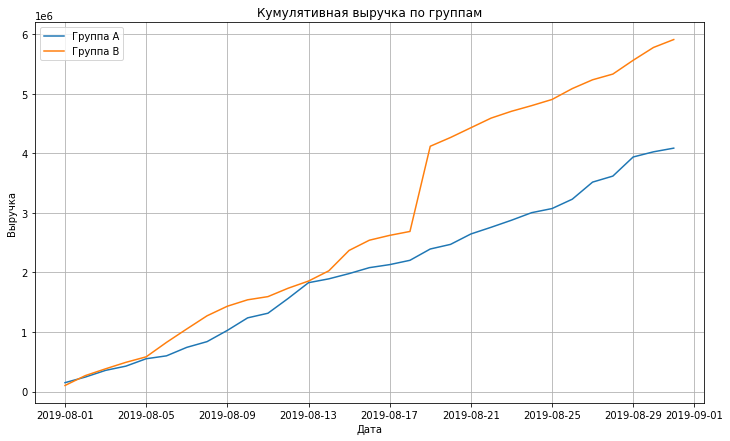

In [16]:
plt.rcParams["figure.figsize"] = (12, 7)
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.grid()
plt.show()

Тренд накопительной выручки в обеих группах положительный, однако, сразу в глаза бросается резкое ее увеличение в группе В - возможно в данных есть выбросы и аномалии, которые, как раз на это и влияют.

#### Построение графика среднего чека по группам

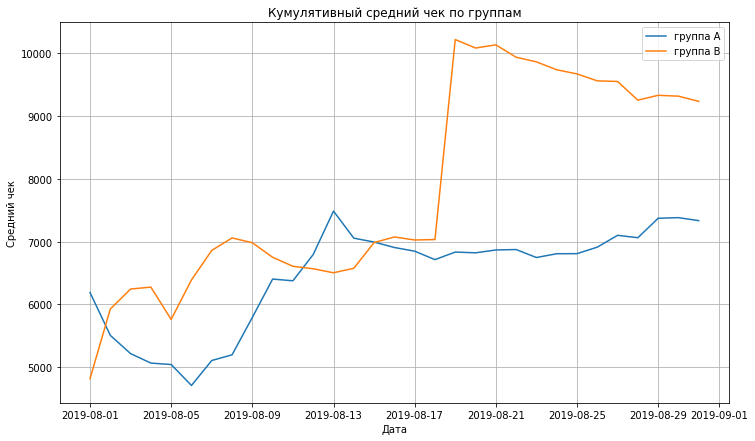

In [17]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.grid()
plt.show()

Здесь картина начинает проясняться. В группе 'B' отчетливо видны крупны покупки-аномалии, которые происходят не так часто. Это как раз является выбросом, который снижает точность результата. Необходимо детально проанализовать выбросы.

#### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

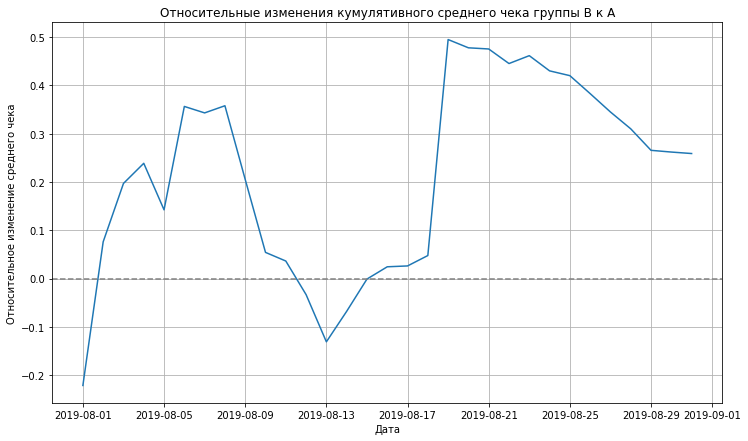

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительные изменения кумулятивного среднего чека группы В к А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего чека')
plt.grid()
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

Видно отчетливое резкое изменение резултатов в разные даты, что подтверждает наличие аномальных крупных покупок.

#### Построение графика кумулятивного среднего количества заказов на посетителя по группам

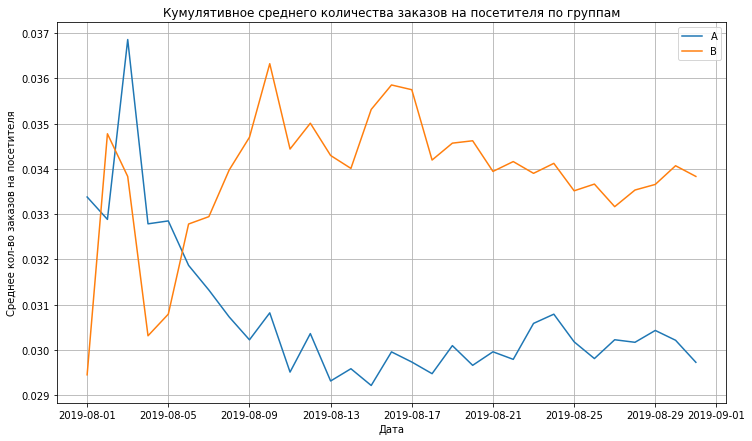

In [19]:
cumulativeData['order_visitor'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['orders']/cumulativeDataA['visitors'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['orders']/cumulativeDataB['visitors'], label='B')
plt.title('Кумулятивное среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов на посетителя')
plt.grid()
plt.legend()
plt.show()

Наблюдаю, что среднее количество заказов в группах в первые дни сильно колеблется, затем показатели начали стабилизироваться. Среднее количество заказов на одного посетителя в группе B больше.

#### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

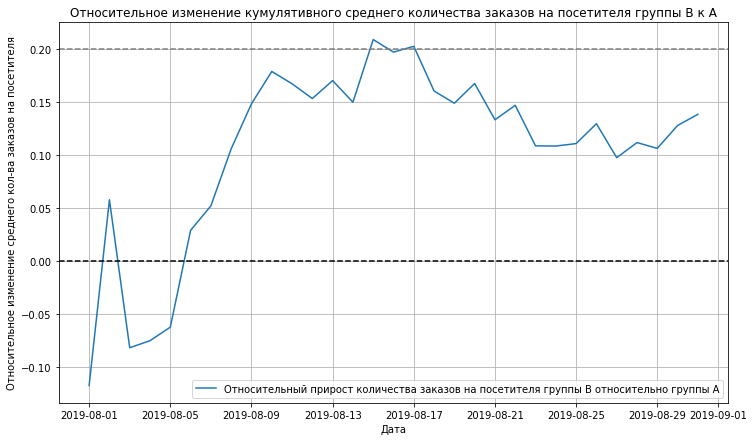

In [20]:
mergedCumulativeData = cumulativeDataA[['date','order_visitor']].merge(cumulativeDataB[['date','order_visitor']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeData['date'], mergedCumulativeData['order_visitorB']/mergedCumulativeData['order_visitorA']-1, label="Относительный прирост количества заказов на посетителя группы B относительно группы A")
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего кол-ва заказов на посетителя')
plt.grid()
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()

Из графика следует, что почти с самого начала теста у поситетелей группы В среднее количество заказов больше, чем у группы А от 10% до 20%.

#### Построение точечного графика количества заказов по пользователям

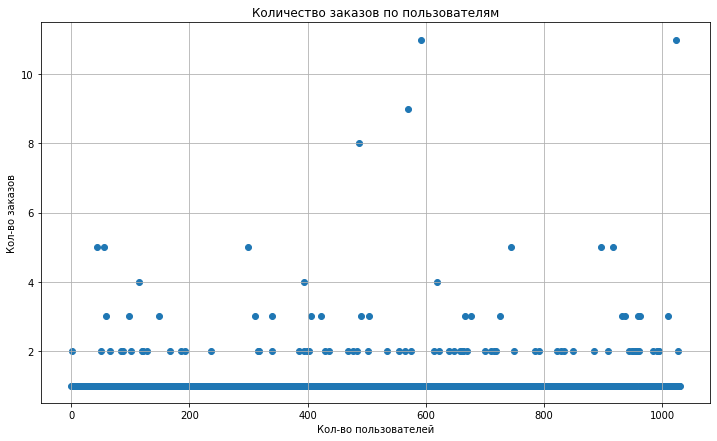

In [21]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

plt.grid()
plt.title('Количество заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

Можно сделать вывод, что в основном, пользователи делают по одному заказу. С увеличением количества заказов на пользователей, совершающих их, становится меньше.

#### Расчет 95-го и 99-го перцентиля количества заказов на пользователя

In [22]:
print('90, 95 и 99 перцентили стоимости заказов:', np.percentile(ordersByUsers['orders'],[90,95,99]))

90, 95 и 99 перцентили стоимости заказов: [1. 2. 4.]


Делаем вывод, что не более 5% пользователей совершили 2 заказа. Всего лишь 1% пользователей совершил 4 заказа. Исходя из этого, значение, после которого количество заказов считается аномальным - 2.

#### Построение точечного графика стоимостей заказов

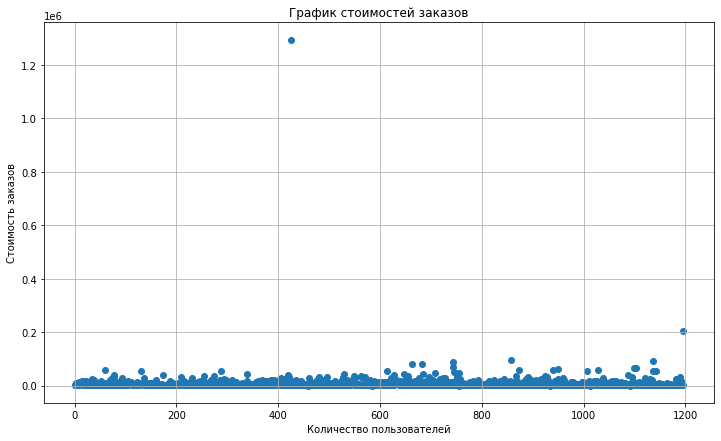

In [23]:
RevenueByUsers = pd.Series(range(0, len(orders['revenue'])))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.scatter(RevenueByUsers, orders['revenue'])
plt.show()

Видно, что средняя стоимость заказа не превышает 200 тысяч рублей. Можно также видеть выбросы на сумме в 1.2 миллиона рублей.

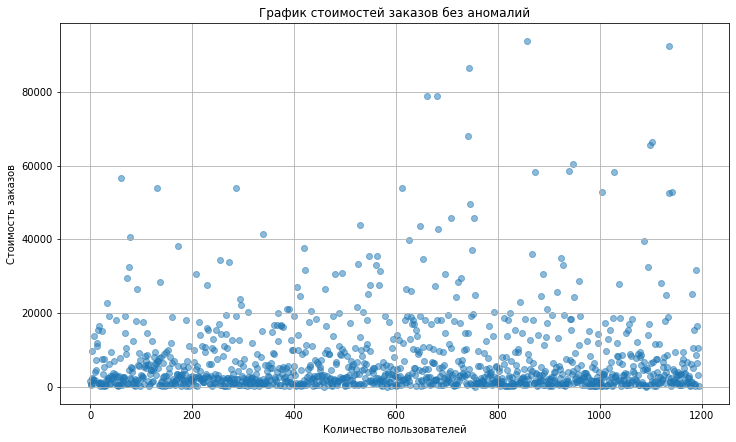

In [24]:
result = orders[orders['revenue']<=200000]['revenue']
xn_values = pd.Series(range(0,len(result)))
plt.grid()
plt.title('График стоимостей заказов без аномалий')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.scatter(xn_values, result, alpha=0.5)
plt.show()

Обозначив более узкий для анализа интервал стоимости, можно сделать вывод, что, все-таки большая часть заказов не превышвет 20 тысяч рублей, после этой границы график становится разреженным.

#### Расчет 95-го и 99-го перцентиля стоимости заказов на пользователя

In [25]:
print('90, 95 и 99 перцентили стоимости заказов:', np.percentile(orders['revenue'],[90,95,99]))

90, 95 и 99 перцентили стоимости заказов: [18168.  28000.  58233.2]


Расчет перцентилей дополнил предыдущий вывод - 99% заказов не превышают суммы в 58233,2 рубля. В последствии возьмем сумму 59000 рублей - пороговая сумма для отсечения аномалий.

#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Для расчета нам необходимо сформулировать гипотезы.

Н0 - различий в среднем количестве заказов на посетителя между группами нет.

Альтернативная гипотеза - различия в среднем количестве заказов на посетителя между группами есть.

Для проверки предположения о нормальности распределения данных используем критерий Манна-Уитни, так как в данных, как мы уже заметили, есть выбросы, а иные методы существенно повлияют на результат проверки.

In [26]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Значение P-value:', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))


print('Относительная разница между группами:',"{0:.3f}".format((sampleB.mean()/sampleA.mean()-1)))              

Значение P-value: 0.017
Относительная разница между группами: 0.138


По результам значение p-value меньше 0.05 - значит, нулевая гипотеза отвергается, так как имеются статистически значимые отличия. Разница между группами составляет практически 14%.

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

In [27]:
print('Значение P-value:','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница между группами:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение P-value: 0.729
Относительная разница между группами: 0.259


Здесь немного иная картина: значение p-value больше 0.05, что означает отсутствие статистически значимых отличий. Однако, относительный прирост среднего чека группы B к группе A составляет практически 26%!

#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [28]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 59000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Абсолютные потери(количество аномальных пользователей):' ,len(abnormalUsers)) 
print('Относительные потери:', round(len(abnormalUsers)/orders['visitorId'].nunique(),3))

Абсолютные потери(количество аномальных пользователей): 14
Относительные потери: 0.014


In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('Значение P-value:','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница между группами:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Значение P-value: 0.013
Относительная разница между группами: 0.155


После "очистки" данных, видно, что статистическая значимость теста также достигнута, как и при "сырых" данных. Группа B проявляет себя лучше, чем группа А.

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [30]:
print('Значение P-value:',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительная разница между группами:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Значение P-value: 0.814
Относительная разница между группами: 0.007


Заметно, что в среднем чеке нету разницы, используя либо "сырые", либо "очищенные" данные. Однако, средний чек группы B вышел на 7% ниже, чем у группы А. Здесь важно отметить то, что с "сырыми" данными он был в несколько раз больше.

### Итоговый вывод

По результатам A/B-тестирования сформировалась определенная картина, исходя из которой, можно принять решение.
1. По среднему количеству заказов побеждает группа В
2. По средему чеку пользователей отличия отсутствуют

Мое мнение - признать победу группы В. Рекомендации - разработать стратегию по увеличению среднего чека.